In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg

## Matrix operations  in NumPy

If we define a vector and matrix, we can multiply them explicitly, but it is better to use NumPy routines.

In [2]:
n = 30000
A = np.zeros((n, n))
x = np.zeros(n)

In [3]:
def explicit(A=None, x=None):
    n = A.shape[0]
    b = np.zeros(n)
    for i in np.arange(n):
        b[i] = (A[i, :] * x).sum()
    return(b)

In [4]:
%timeit b = explicit(A=A, x=x)

1 loop, best of 3: 1.5 s per loop


In [5]:
%timeit b = A.dot(x)

1 loop, best of 3: 334 ms per loop


One can also make outer products and other operations with NumPy arrays.

In [10]:
x = np.zeros(100)
q = np.zeros(50)
y = np.outer(x, q)
print(y.shape)

(100, 50)


And the numpy.linalg module contains a plethora of other operations.

In [11]:
y = np.zeros((100, 100))
print(linalg.det(y))

0.0


## Solving a linear system

In [32]:
n = 20
A = np.random.random((20, 20))
x_actual = np.random.random(20)

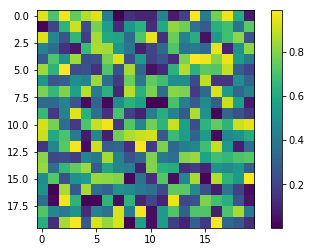

In [33]:
plt.imshow(A)
plt.colorbar()

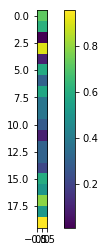

In [34]:
plt.imshow(x_actual.reshape((20, 1)))
plt.colorbar()

In [35]:
b = A.dot(x_actual)

In [36]:
x = linalg.solve(A, b).reshape(n)

In [37]:
print(x)

[ 0.71999958  0.61592846  0.00944744  0.90218934  0.09502431  0.58581859
  0.3095642   0.57030069  0.38079224  0.37816019  0.2789396   0.0908622
  0.31026377  0.3085162   0.21491598  0.59246296  0.51043701  0.78970687
  0.51542921  0.95314045]


In [39]:
print(x - x_actual)

[  1.77635684e-15  -2.55351296e-15  -2.63851441e-15   1.22124533e-15
   2.56739074e-15   1.99840144e-15   1.94289029e-15   1.11022302e-15
  -2.88657986e-15   1.66533454e-15   1.44328993e-15  -3.33066907e-15
  -3.33066907e-16  -4.16333634e-15  -4.57966998e-15   3.10862447e-15
  -3.88578059e-15   9.32587341e-15  -7.32747196e-15   4.66293670e-15]


We can also solve this by explicitly taking the inverse. If we are going to need to solve the equation more than $N$ times, this becomes worthwhile, because we can just calculate and save the inverse, and then apply it, rather than performing the backsubstitution explicitly every time.

In [41]:
Ainv = linalg.inv(A)
x = Ainv.dot(b)
print(x - x_actual)

[  1.01030295e-14   2.22044605e-15  -5.10702591e-15  -3.21964677e-15
   9.99200722e-16  -2.88657986e-15  -1.99840144e-15   4.77395901e-15
   2.22044605e-15  -1.03250741e-14   4.77395901e-15   7.21644966e-15
  -9.99200722e-16  -5.88418203e-15  -4.10782519e-15   5.55111512e-16
   2.77555756e-15  -5.55111512e-16   8.88178420e-15  -4.21884749e-15]


## NumPy Application of SVD

Let us explore how a matrix works as a linear mapping, and how SVD tells us about that linear mapping.

In [54]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = 0.5
A[1, 0] = 0.5  
A[1, 1] = 1
print(A)

[[ 1.   0.5]
 [ 0.5  1. ]]


Let's take two basis vectors for the space of $\vec{x}$:

In [59]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

(-0.1, 1.3)

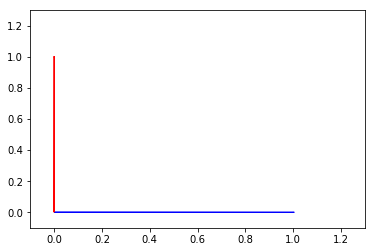

In [92]:
plt.arrow(origin[0], origin[1], x0[0], x0[1], color='blue')
plt.arrow(origin[0], origin[1], x1[0], x1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))


In [68]:
b0 = A.dot(x0)
b1 = A.dot(x1)

(-0.1, 1.3)

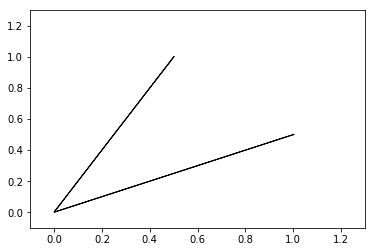

In [69]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))

In [70]:
(U, w, VT) = linalg.svd(A)

In [71]:
print(w)

[ 1.5  0.5]


In [74]:
print(U)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [73]:
print(VT)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [79]:
Ainv = VT.transpose().dot(np.diag(1. / w)).dot(U.transpose())
print(Ainv.dot(b0))
print(Ainv.dot(b1))

[  1.00000000e+00   3.33066907e-16]
[ -1.11022302e-16   1.00000000e+00]


## A simple singular matrix

In [106]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = -1
A[1, 0] = -1
A[1, 1] = 1
print(A)

[[ 1. -1.]
 [-1.  1.]]


We can see clearly the range of $A$ by throwing a bunch of random points at it.

In [107]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

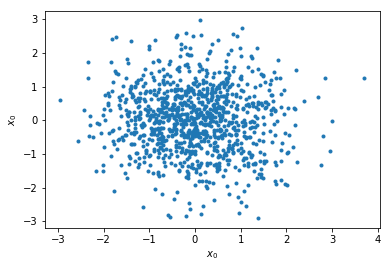

In [108]:
plt.plot(x[0, :], x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_0$")

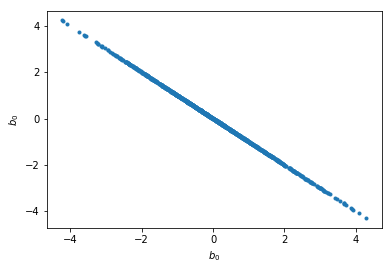

In [109]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_0$")

It is sufficient, in fact, to look just at what happens to the basis vectors (all other results are just a linear combination of those).

In [110]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

In [111]:
b0 = A.dot(x0)
b1 = A.dot(x1)

(-1.3, 1.3)

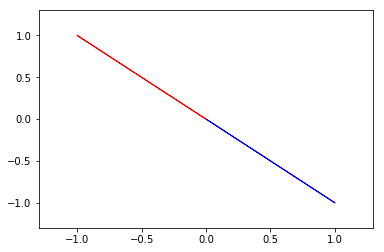

In [112]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-1.3, 1.3))
plt.ylim((-1.3, 1.3))

SVD gives us a diagnosis; for much higher dimensional problems this is very useful.

In [113]:
(U, w, VT) = np.linalg.svd(A)

Note that this results in a zero component of $w$:

In [126]:
print(w)

[ 2.  0.]


The columns of ${\bf U}$ corresponding to non-zero $w_j$ give the range of ${\bf A}$:

In [127]:
print(U[:, 0])

[-0.70710678  0.70710678]


And the columns of ${\bf V}$ corresponding to zero $w_j$ give the null space: 

In [128]:
print(VT.transpose()[:, 1])

[ 0.70710678  0.70710678]


We can see how SVD works on some simple examples. If $\vec{b} = (-0.5, 0.6)$, we should expect to get an $\vec{x}$ that gets us as close as we can get to this within the range of ${\bf A}$. It will not get us exactly there however.

In [130]:
winv = np.zeros(len(w))
indx = np.where(w > 1.e-15)[0]
winv[indx] = 1. / w[indx]
print(winv)

[ 0.5  0. ]


In [131]:
Ainv = VT.transpose().dot(np.diag(winv)).dot(U.transpose()) 

In [132]:
b = np.array([-0.5, 0.6])
x = Ainv.dot(b)

In [133]:
print(x)

[-0.275  0.275]


${\bf A}\cdot\vec{x}$ yields some approximation of $\vec{b}$, that lies in the range:

In [136]:
bapprox = print(A.dot(x))

[-0.55  0.55]


If $\vec{b}$ is in the range, e.g. is $(1, -1)$, it can be recovered exactly: 

In [144]:
b = np.array([1., -1])
x = Ainv.dot(b)

In [145]:
print(x)

[ 0.5 -0.5]


In [146]:
bapprox = print(A.dot(x))

[ 1. -1.]


Note that the null space allows me to add any vector with $x_0 = x_1$ to the above solution. The given $\vec{x}$ is the choice which minimizes its norm.